<a href="https://colab.research.google.com/github/MarcioMot4/Projetos-PORT-pt-br/blob/Analise-de-Dados/Projeto___O1__Rascunho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Objetivo
This project focuses on providing data-driven recommendations for improving the impact of future marketing campaigns.


# INTRODUÇÃO

Um titulo bem criativo / chamativo
um subtitulo explicativo

Dados cortesia de Maven..

Dados de campanha de marketing de 2.240 clientes da Maven Marketing, incluindo perfis de clientes, preferências de produtos, sucessos/fracassos de campanha e desempenho do canal.


https://www.mavenanalytics.io/data-playground?search=marketing

nome da base. (ano)
DATE ADDED
02/05/2021



Cmo estrutura basica vou usar a proposta  ... bla bla bla ..
Authors Thomas Erl, Wajid Khattak, and Paul Buhler proposed a big data analytics life cycle in their book, [Big Data Fundamentals: Concepts, Drivers & Techniques](https://www.amazon.com.br/Big-Data-Fundamentals-Concepts-Techniques/dp/0134291077). Their life cycle suggests phases divided into nine steps:



*   Business case evaluation
*   Data identification
*   Data acquisition and filtering
*   Data extraction
*   Data validation and cleaning 
*   Data aggregation and representation
*   Data analysis
*   Data visualization
*   Utilization of analysis results

# O que você vai encontrar neste projeto?


In [ ]:
# usar esta estrutura 



This article was published as a part of the Data Science Blogathon.

Introduction
Customer segmentation is the process by which we divide customers into groups based on common characteristics like demographics (age, gender, income, etc.), geography, psychology, and behavior. The main aim of customer segmentation is to identify different groups of customers so that specific groups can be targeted and marketed with particular plans.

This article will take us through the essential concepts of customer segmentation and RFM analysis. We will learn the step-by-step process of performing RFM analysis in Tableau. We will explore specific tools and functions in Tableau to analyze key customer traits. Ultimately, we will understand how to create customer groups or segments using on transactional data.

So, let’s get started.

What is RFM Analysis?
RFM analysis is a method for customer segmentation that groups customers based on their past purchase behavior. RFM stands for three key customer traits, i.e., Recency of purchase, Frequency of purchase, and Monetary value of purchase.

Recency (R) – Time or days since last purchase or last order


Become a Full-Stack Data Scientist
Date: SUNDAY, 26 Feb 2023 Time: 1 PM – 2 PM IST

Frequency (F) – Total number of purchases or count of transactions

Monetary value (M) – Total amount spend or average basket size

Frequency and Monetary attributes affect a customer’s lifetime value, and Recency affects retention and the amount of engagement. RFM is popularly used to analyze customer types, especially in the retail industry. For example, people who make frequent purchases on an e-commerce website but of small amounts can be considered high “frequency” but “low-monetary” customers. RFM analysis can help answer critical business questions like who are the best customers, who have the potential to become the best customers, who can contribute to churn, and who respond to a particular marketing campaign.

# O que vamos procurar responder??

*   Há fatores que influenciam as compras online de forma significativa?
*   Quais campanhas de Marketing tiveram melhor desempenho?
*   Qual foi a mais bem sucedida?
*   Onde estão localizado os clientes que gastam mais?
*   Qual o perfil médio de um cliente da Maven?
*   Quais produtos performam melhor?
*   Quais canais são os favoritos dos clientes?




# Um pouco de contexto...

TEXTO explicano o contexto 



https://miro.medium.com/v2/resize:fit:720/format:webp/1*yGnextq6fk1ujjjQb74FaA.png

# Metodologia / ferramentas

TEXTO explicando a metodologia




# **Código**
*Let code!*

In [ ]:
#carregando as bibliotecas e instalando módulos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import geopy
from geopy.geocoders import Nominatim
from datetime import datetime
from google.colab import files
## as de cima eu já usei
from pathlib import Path
import re
import sqlite3



In [ ]:
#carregando os dados
base0 = pd.read_excel ("https://marciomm7.files.wordpress.com/2023/02/sales_rfm.xlsx")


# Avaliação Diagnóstica da base de dados



In [ ]:
#exploração inicial da base de dados
base0.shape

(2240, 28)

In [ ]:

base0.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,Spain
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,Canada
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,USA
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,Australia
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,Spain


In [ ]:
base0.tail()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,11,4,0,0,0,0,0,0,0,USA
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,3,8,0,0,0,0,0,0,0,Spain
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,5,8,0,0,0,0,0,0,0,Spain
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,10,3,0,0,0,0,0,0,0,India
2239,4070,1969,PhD,Married,94871.0,0,2,2012-09-01,99,169,...,4,7,0,1,1,0,0,1,0,Canada


# Procurando por valores duplicados ou redundantes


In [ ]:
base0.duplicated().sum()

0

In [ ]:
#Procurando por valores duplicados ou redundantes nas colunas tipo string / texto

#Education
display(base0['Education'].unique())

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [ ]:
#Country
display(base0['Country'].unique()) 


array(['Spain', 'Canada', 'USA', 'Australia', 'Germany', 'India',
       'Saudi Arabia', 'Mexico'], dtype=object)

In [ ]:
#Marital_Status
display(base0['Marital_Status'].unique())


array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [ ]:
# Problemas encontrados:

 ## 1) o campo **Marital_Status** 
          #  itens duplicados: "Alone" e "Single" parecem ser a mesma coisa (conirmar com cliente)

In [ ]:
base0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4    Income              2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [ ]:
 base0.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [ ]:
# Problemas encontrados:

 ## 1) o campo **Marital_Status** 
          #  itens duplicados: "Alone" e "Single" parecem ser a mesma coisa (conirmar com cliente)
          
 ## 2) o campo **Income** 
          #  tem um espaço no titulo
          #  há valores faltantes

 # Em uma primeira análise, não parecem haver campos nulos e os tipos de dados (dtypes) também parecem fazer sentido.

# METADADOS
Para entender melhor o conteúdo de cada coluna e, assim, conseguir avaliar de maneira mais completa se elas contêm o que deveriam ou se há erros, vou precisar recorrer a uma base de dados complementar. 

A base de metadados enviada pelo cliente ***Maven Marketing***, juntamente com a base de dados principal, contém  algumas informações descritivas sobre cada um dos campos. 

In [ ]:
# METADADOS: entendendo o que signfica cada um dos campos
metadados = pd.read_excel ("https://marciomm7.files.wordpress.com/2023/02/meta_data.xlsx")
display (metadados)

,Field,Description
0,ID,Customer's unique identifier
1,Year_Birth,Customer's birth year
2,Education,Customer's education level
3,Marital_Status,Customer's marital status
4,Income,Customer's yearly household income
5,Kidhome,Number of children in customer's household
6,Teenhome,Number of teenagers in customer's household
7,Dt_Customer,Date of customer's enrollment with the company
8,Recency,Number of days since customer's last purchase
9,MntWines,Amount spent on wine in the last 2 years


# Tradução / Interpretação (Metadados):

Primeiramente, para ficar ainda mais claro, vou traduzir o conteúdo e já alterar o nome dos campos. Essa identificação seguirá a mesma ao longo do processo de manipulação, limpeza e análise. 


> TRADUÇÃO LIVRE: como são poucas linhas e vou precisar explicar cada uma delas. não vou usar nenhuma biblioteca de tradução, vou usar minhas próprias palavras e conhecimento da área para renomear cada titulo e detalhar cada conceito na descrição do campo.

> NOTA: Em um cenário real, estou assumindo que tive uma conversa prévia com o cliente para validar o entendimento sobre cada um destes campos.

In [ ]:
#começando pelos titulos das colunas
metadados_cols = ['Campo', 'Descricao']
metadados.columns = metadados_cols
metadados.head(4)


,Campo,Descricao
0,ID,Customer's unique identifier
1,Year_Birth,Customer's birth year
2,Education,Customer's education level
3,Marital_Status,Customer's marital status


In [ ]:
# agora o conteúdo:


# um primeiro teste aplicando a tradução aos primeiros campos

#Título dos Atributos ds clientes
metadados['Campo'] = metadados['Campo'].replace(['Year_Birth','Education','Marital_Status','Income','Kidhome'],['Ano_Nascto', 'Educacao', 'Est_Civil', 'Renda', 'Nro_Criancas'])

#Descrição dos Atributos
metadados['Descricao'] = metadados['Descricao'].replace(['Customer\'s unique identifier', 'Customer\'s birth year','Customer\'s education level','Customer\'s marital status','Customer\'s yearly household income','Number of children in customer\'s household'],['Código de Identificação do cliente','Ano de NASCIMENTO do cliente', 'Nível de EDUCAÇÃO Formal do cliente', 'Estado Civil do cliente', 'Nível de RENDA do cliente', 'Quantidade de CRIANÇAS que são dependentes do cliente'])


metadados.head(6)


,Campo,Descricao
0,ID,Código de Identificação do cliente
1,Ano_Nascto,Ano de NASCIMENTO do cliente
2,Educacao,Nível de EDUCAÇÃO Formal do cliente
3,Est_Civil,Estado Civil do cliente
4,Income,Nível de RENDA do cliente
5,Nro_Criancas,Quantidade de CRIANÇAS que são dependentes do cliente


In [ ]:
# Funcionou na amostra, agora é só aplicar nos demais campos. Como os textos são longos, organizei diferente para melhor visualização da documentação


#Título dos Atributos ds clientes
metadados['Campo'] = metadados['Campo'].replace(['Teenhome'],['Nro_Adolesc'])
metadados['Campo'] = metadados['Campo'].replace(['Dt_Customer'],['Dt_Cadastro'])
metadados['Campo'] = metadados['Campo'].replace(['Recency'],['Recencia'])
metadados['Campo'] = metadados['Campo'].replace(['MntWines'],['Vlr_Vinho'])
metadados['Campo'] = metadados['Campo'].replace(['MntFruits'],['Vlr_Frutas'])
metadados['Campo'] = metadados['Campo'].replace(['MntMeatProducts'],['Vlr_Carne'])
metadados['Campo'] = metadados['Campo'].replace(['MntFishProducts'],['Vlr_Peixe'])
metadados['Campo'] = metadados['Campo'].replace(['MntSweetProducts'],['Vlr_Doces'])
metadados['Campo'] = metadados['Campo'].replace(['MntGoldProds'],['Vlr_Ouro'])
metadados['Campo'] = metadados['Campo'].replace(['NumDealsPurchases'],['Nro_Peds_Dsc'])
metadados['Campo'] = metadados['Campo'].replace(['NumWebPurchases'],['Nro_Peds_Site'])
metadados['Campo'] = metadados['Campo'].replace(['NumCatalogPurchases'],['Nro_Peds_Catlg'])
metadados['Campo'] = metadados['Campo'].replace(['NumStorePurchases'],['Nro_Peds_Loja'])
metadados['Campo'] = metadados['Campo'].replace(['NumWebVisitsMonth'],['Visitas_Site_Mes-1'])
metadados['Campo'] = metadados['Campo'].replace(['AcceptedCmp3'],['Conv_3a_camp'])
metadados['Campo'] = metadados['Campo'].replace(['AcceptedCmp4'],['Conv_4a_camp'])
metadados['Campo'] = metadados['Campo'].replace(['AcceptedCmp5'],['Conv_5a_camp'])
metadados['Campo'] = metadados['Campo'].replace(['AcceptedCmp1'],['Conv_1a_camp'])
metadados['Campo'] = metadados['Campo'].replace(['AcceptedCmp2'],['Conv_2a_camp'])
metadados['Campo'] = metadados['Campo'].replace(['Response'],['Conv_ult_camp'])
metadados['Campo'] = metadados['Campo'].replace(['Complain'],['Reclam_ult_2anos'])
metadados['Campo'] = metadados['Campo'].replace(['Country'],['Localizacao'])



In [ ]:
##Descrição dos Atributos

metadados['Descricao'] = metadados['Descricao'].replace(['Number of teenagers in customer\'s household'],['Quantidade de ADOLESCENTES que são dependentes do cliente'])
metadados['Descricao'] = metadados['Descricao'].replace(['Date of customer\'s enrollment with the company'], ['Data de Cadastro do Cliente'])
metadados['Descricao'] = metadados['Descricao'].replace(['Number of days since customer\'s last purchase'],['Número de Dias desde a última compra'])
metadados['Descricao'] = metadados['Descricao'].replace(['Amount spent on wine in the last 2 years'],['Valor total gasto em VINHOS nos últimos 2 anos'])
metadados['Descricao'] = metadados['Descricao'].replace(['Amount spent on fruits in the last 2 years'],['Valor total gasto em FRUTAS nos últimos 2 anos'])
metadados['Descricao'] = metadados['Descricao'].replace(['Amount spent on meat in the last 2 years'],['Valor total gasto em CARNE nos últimos 2 anos'])
metadados['Descricao'] = metadados['Descricao'].replace(['Amount spent on fish in the last 2 years'],['Valor total gasto em PEIXE nos últimos 2 anos'])
metadados['Descricao'] = metadados['Descricao'].replace(['Amount spent on sweets in the last 2 years'],['Valor total gasto em DOCE nos últimos 2 anos'])
metadados['Descricao'] = metadados['Descricao'].replace(['Amount spent on gold in the last 2 years'],['Valor total gasto em OURO nos últimos 2 anos'])
metadados['Descricao'] = metadados['Descricao'].replace(['Number of purchases made with a discount'],['Número de pedidos feitos com DESCONTO'])
metadados['Descricao'] = metadados['Descricao'].replace(['Number of purchases made through the company\'s web site'],['Número de pedidos feitos via SITE'])
metadados['Descricao'] = metadados['Descricao'].replace(['Number of purchases made using a catalogue'],['Número de pedidos feitos via CATALOGO'])
metadados['Descricao'] = metadados['Descricao'].replace(['Number of purchases made directly in stores'],['Número de pedidos feitos diretamente na LOJA'])
metadados['Descricao'] = metadados['Descricao'].replace(['Number of visits to company\'s web site in the last month'],['Número de VISITAS AO SITE no ultimo mês'])
metadados['Descricao'] = metadados['Descricao'].replace(['1 if customer accepted the offer in the 3rd campaign, 0 otherwise'],['Indica se o cliente converteu na 3ª CAMPANHA enviada (1 pra SIM. 0 pra NÃO)'])
metadados['Descricao'] = metadados['Descricao'].replace(['1 if customer accepted the offer in the 4th campaign, 0 otherwise'],['Indica se o cliente converteu na 4ª CAMPANHA enviada (1 pra SIM. 0 pra NÃO)'])
metadados['Descricao'] = metadados['Descricao'].replace(['1 if customer accepted the offer in the 5th campaign, 0 otherwise'],['Indica se o cliente converteu na 5ª CAMPANHA enviada (1 pra SIM. 0 pra NÃO)'])
metadados['Descricao'] = metadados['Descricao'].replace(['1 if customer accepted the offer in the 1st campaign, 0 otherwise'],['Indica se o cliente converteu na 1ª CAMPANHA enviada (1 pra SIM. 0 pra NÃO)'])
metadados['Descricao'] = metadados['Descricao'].replace(['1 if customer accepted the offer in the 2nd campaign, 0 otherwise'],['Indica se o cliente converteu na 2ª CAMPANHA enviada (1 pra SIM. 0 pra NÃO)'])
metadados['Descricao'] = metadados['Descricao'].replace(['1 if customer accepted the offer in the last campaign, 0 otherwise'],['Indica se o cliente converteu na ULTIMA CAMPANHA enviada (1 pra SIM. 0 pra NÃO)'])
metadados['Descricao'] = metadados['Descricao'].replace(['1 if customer complained in the last 2 years, 0 otherwise'],['Indica se o cliente manifestou formalmente alguma RECLAMAÇÃO nos últimos 2 anos'])
metadados['Descricao'] = metadados['Descricao'].replace(['Customer\'s location'],['Localização atual do cliente'])



In [ ]:
# Conferindo se está tudo OK

pd.options.display.max_colwidth = 100
display (metadados)

,Campo,Descricao
0,ID,Código de Identificação do cliente
1,Ano_Nascto,Ano de NASCIMENTO do cliente
2,Educacao,Nível de EDUCAÇÃO Formal do cliente
3,Est_Civil,Estado Civil do cliente
4,Income,Nível de RENDA do cliente
5,Nro_Criancas,Quantidade de CRIANÇAS que são dependentes do cliente
6,Nro_Adolesc,Quantidade de ADOLESCENTES que são dependentes do cliente
7,Dt_Cadastro,Data de Cadastro do Cliente
8,Recencia,Número de Dias desde a última compra
9,Vlr_Vinho,Valor total gasto em VINHOS nos últimos 2 anos


Com base nestas novas informações, já podemos olhar para a base com novos olhos:
 
 **É possível afirmar que temos 05 tipos distintos** e complementares sobre  os clientes da Maven, são eles:



In [ ]:
#1) Informações sobre o PERFIL dos clientes 
kpis_perfil  = [0, 1, 2, 3, 4, 5, 6, 27]
display(metadados.iloc[kpis_perfil])


,Campo,Descricao
0,ID,Código de Identificação do cliente
1,Ano_Nascto,Ano de NASCIMENTO do cliente
2,Educacao,Nível de EDUCAÇÃO Formal do cliente
3,Est_Civil,Estado Civil do cliente
4,Income,Nível de RENDA do cliente
5,Nro_Criancas,Quantidade de CRIANÇAS que são dependentes do cliente
6,Nro_Adolesc,Quantidade de ADOLESCENTES que são dependentes do cliente
27,Localizacao,Localização atual do cliente


In [ ]:
#2) Informações sobre ENGAJAMENTO destes clientes com a empresa
kpis_engajamento  = [ 7, 8, 15, 26]
display(metadados.iloc[kpis_engajamento])

,Campo,Descricao
7,Dt_Cadastro,Data de Cadastro do Cliente
8,Recencia,Número de Dias desde a última compra
15,Nro_Peds_Dsc,Número de pedidos feitos com DESCONTO
26,Reclam_ult_2anos,Indica se o cliente manifestou formalmente alguma RECLAMAÇÃO nos últimos 2 anos


In [ ]:
#3) Informações sobre o PRODUTOS PREFERIDOS dos clientes
display(metadados.iloc[9:15])

,Campo,Descricao
9,Vlr_Vinho,Valor total gasto em VINHOS nos últimos 2 anos
10,Vlr_Frutas,Valor total gasto em FRUTAS nos últimos 2 anos
11,Vlr_Carne,Valor total gasto em CARNE nos últimos 2 anos
12,Vlr_Peixe,Valor total gasto em PEIXE nos últimos 2 anos
13,Vlr_Doces,Valor total gasto em DOCE nos últimos 2 anos
14,Vlr_Ouro,Valor total gasto em OURO nos últimos 2 anos


In [ ]:
#4) Informações sobre a PREFERENCIA POR CANAIS  DE VENDA por parte destes clientes 
display(metadados.iloc[16:20])

,Campo,Descricao
16,Nro_Peds_Site,Número de pedidos feitos via SITE
17,Nro_Peds_Catlg,Número de pedidos feitos via CATALOGO
18,Nro_Peds_Loja,Número de pedidos feitos diretamente na LOJA
19,Visitas_Site_Mes-1,Número de VISITAS AO SITE no ultimo mês


In [ ]:
#5) Informações sobre o DESEMPENHO DAS CAMPANHAS de Marketing
display(metadados.iloc[20:26])

,Campo,Descricao
20,Conv_3a_camp,Indica se o cliente converteu na 3ª CAMPANHA enviada (1 pra SIM. 0 pra NÃO)
21,Conv_4a_camp,Indica se o cliente converteu na 4ª CAMPANHA enviada (1 pra SIM. 0 pra NÃO)
22,Conv_5a_camp,Indica se o cliente converteu na 5ª CAMPANHA enviada (1 pra SIM. 0 pra NÃO)
23,Conv_1a_camp,Indica se o cliente converteu na 1ª CAMPANHA enviada (1 pra SIM. 0 pra NÃO)
24,Conv_2a_camp,Indica se o cliente converteu na 2ª CAMPANHA enviada (1 pra SIM. 0 pra NÃO)
25,Conv_ult_camp,Indica se o cliente converteu na ULTIMA CAMPANHA enviada (1 pra SIM. 0 pra NÃO)


Voltemos, agora, novamente a atenção à base de dados principal e, a partir dos conhecimentos gerados pelo detalhamento e interpretaão dos metadados acima, já conseguimos identificar novas inconsistencias e pontos de melhoria


In [ ]:
base0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4    Income              2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [ ]:
# Problemas encontrados:

 ## 1) o campo **Marital_Status** 
          #  itens duplicados: "Alone" e "Single" parecem ser a mesma coisa (conirmar com cliente)
          
 ## 2) o campo **Income** 
          #  tem um espaço no titulo
          #  há valores faltantes (2240 vs 2216)

 ## 3) tipos de dados (dtypes) incorretos nas colunas: 
           #  ID             (deveria ser string)
           #  Year_Birth     (deveria ser datetime64[ns])
           #  Dt_Customer    (deveria ser datetime64[ns])
           #  AcceptedCmp3   (deveria ser Category)
           #  AcceptedCmp4   (deveria ser Category)
           #  AcceptedCmp5   (deveria ser Category)
           #  AcceptedCmp1   (deveria ser Category)
           #  AcceptedCmp2   (deveria ser Category)
           #  Response       (deveria ser Category)
           #  Complain       (deveria ser Category)



# Identificando "Outliers"

In [ ]:
# Quando os clientes fizeram o Cadastro / 1a compra ?? Há alguma data estranha, fora de um range que possamos coniderar comum?
base0['Dt_Customer'].min()

Timestamp('2012-07-30 00:00:00')

In [ ]:
base0['Dt_Customer'].max()

Timestamp('2014-06-29 00:00:00')

In [ ]:
# Datas de Cadastro entre 2012 e 2014. Parece tudo OK.
# Vamos conferir as datas de nascimento dos clientes da base 
base0['Year_Birth'].min()

1893

In [ ]:
base0['Year_Birth'].max()

1996

In [ ]:
#Identificar esse cliente com data de nascimento 1893. É isso mesmo? Tem outros?
base0[base0["Year_Birth"] < 1920]     #clientes com mais de 100 anos




,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
513,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,2,4,0,0,0,0,0,0,0,Saudi Arabia
827,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,4,1,0,0,1,0,0,0,0,Spain
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,2,5,0,0,0,0,0,0,1,India


In [ ]:
#Viraram clientes (cadastro / 1a compra) com mais de 100 anos.  
print( "ATENÇÃO para clientes com" , 2014 - 1893,
       2013 - 1899, 
       2013 - 1900, "anos de idade e ainda visitando o site NO ULTIMO MÊS. Será??") 

ATENÇÃO para clientes com 121 114 113 anos de idade e ainda visitando o site NO ULTIMO MÊS. Será??


In [ ]:
# Problemas encontrados:

 ## 1) o campo **Marital_Status** 
          #  itens duplicados: "Alone" e "Single" parecem ser a mesma coisa (conirmar com cliente)
          
 ## 2) o campo **Income** 
          #  tem um espaço no titulo
          #  há valores faltantes (2240 vs 2216)

 ## 3) tipos de dados (dtypes) incorretos nas colunas: 
           #  ID             (deveria ser string)
           #  Year_Birth     (deveria ser datetime64[ns])
           #  Dt_Customer    (deveria ser datetime64[ns])
           #  AcceptedCmp3   (deveria ser Category)
           #  AcceptedCmp4   (deveria ser Category)
           #  AcceptedCmp5   (deveria ser Category)
           #  AcceptedCmp1   (deveria ser Category)
           #  AcceptedCmp2   (deveria ser Category)
           #  Response       (deveria ser Category)
           #  Complain       (deveria ser Category)

## 4) Excluir / Confirmar esses clientes com 100+ anos

In [ ]:
# Criando uma cópia da Base de Dados Original
base_1_clean = base0.copy()

In [ ]:
base_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4    Income              2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul


# **LIMPEZA **
#create a copy of dataframe to clean
marketing_clean = marketing_df.copy()

del billion_dat['source_4']

you can drop columns by passing the labels of the columns you want to remove and setting the axis parameter to 1:

df_drop = df.drop(['Count', 'Rank'], axis=1)


Data Quality Issues
Income Column has missing values
Some columns have the wrong data type
Two categories have the same meaning in Marital Status Column












edx_course_descriptions['course_type'] = edx_course_descriptions['course_type'].astype('category')


Ação  / código / checking


In [ ]:
# Enderecando cada um dos Problemas encontrados:

 ## 1) campo **Marital_Status** : corrigir itens duplicados: "Alone" e "Single" são a mesma coisa (CONFIRMADO com cliente)
 
base_1_clean['Marital_Status']=base_1_clean['Marital_Status'].str.replace('Alone', 'Single')

In [ ]:
# conferindo:

#original
display(base0['Marital_Status'].unique())
#clean
display(base_1_clean['Marital_Status'].unique())

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Absurd'], dtype=object)

In [ ]:
 ## 2) Campo ** Income** : espaço no titulo e 24 valores faltantes 
        # o nome da coluna vai ser alterado mais pra frente, junto a outras. Vamos focar em entender / alterar os valores faltantes

base_1_clean[' Income '].isna().sum()

24

In [ ]:
# A base é composta por dados de 2.240 clientes
# 24 deles sem a inforação de Income / Renda representam pouco mais de 1% o total.

print (base_1_clean[' Income '].isna().sum() / 2240 *100, "% do total")


1.0714285714285714 % do total


In [ ]:
#ainda assim, vamos encontrar e corrigi-los
display (base_1_clean[base_1_clean.isna().any(axis=1)])

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
134,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,8,9,0,0,0,0,0,0,0,Germany
262,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,2,7,0,0,0,0,0,0,0,USA
394,3769,1972,PhD,Together,NaN,1,0,2014-03-02,17,25,...,3,7,0,0,0,0,0,0,0,Australia
449,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,0,1,0,0,0,0,0,0,0,Australia
525,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,7,6,0,0,0,0,0,0,0,Canada
590,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,3,8,0,0,0,0,0,0,0,Germany
899,10475,1970,Master,Together,NaN,0,1,2013-04-01,39,187,...,6,5,0,0,0,0,0,0,0,USA
997,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,2,7,0,0,0,0,0,0,0,Germany
1096,4345,1964,2n Cycle,Single,NaN,1,1,2014-01-12,49,5,...,2,7,0,0,0,0,0,0,0,Australia
1185,7187,1969,Master,Together,NaN,1,1,2013-05-18,52,375,...,4,3,0,0,0,0,0,0,0,Australia


In [ ]:
#vou preencher os valore vazios com a média da renda dos clientes da base
base_1_clean[' Income '].mean()

52247.25135379061

In [ ]:
base_1_clean[' Income '] = base_1_clean[' Income '].fillna((base_1_clean[' Income '].mean()))

# conferindo:

#original
display(base0[' Income '].isna().sum())

#clean
display(base_1_clean[' Income '].isna().sum())


24

0

In [ ]:
base_1_clean.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
 Income                0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

In [ ]:
 ## 3) Corrigir tipos de dados (dtypes) incorretos: 
           #  ID             (deveria ser string)
           #  Year_Birth     (deveria ser datetime64[ns])
           #  Dt_Customer    (deveria ser datetime64[ns])
           #  AcceptedCmp3   (deveria ser Category)
           #  AcceptedCmp4   (deveria ser Category)
           #  AcceptedCmp5   (deveria ser Category)
           #  AcceptedCmp1   (deveria ser Category)
           #  AcceptedCmp2   (deveria ser Category)
           #  Response       (deveria ser Category)
           #  Complain       (deveria ser Category)


In [ ]:
#change to categorical values
cols = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain']
for col in cols:
    base_1_clean[col] = base_1_clean[col].astype('category')
#change to datetime
base_1_clean['Year_Birth'] = pd.to_datetime(base_1_clean['Year_Birth'], format = "%Y")
base_1_clean['Dt_Customer'] = pd.to_datetime(base_1_clean['Dt_Customer'])


#convertendo ID para 'string'
base_1_clean['ID'] = base_1_clean['ID'].astype('str')

In [ ]:
# conferindo:

#original
base0[['ID','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain','Year_Birth', 'Dt_Customer']].dtypes

ID                       int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Response                 int64
Complain                 int64
Year_Birth               int64
Dt_Customer     datetime64[ns]
dtype: object

In [ ]:
#clean
base_1_clean[['ID','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain','Year_Birth', 'Dt_Customer']].dtypes


ID                      object
AcceptedCmp3          category
AcceptedCmp4          category
AcceptedCmp5          category
AcceptedCmp1          category
AcceptedCmp2          category
Response              category
Complain              category
Year_Birth      datetime64[ns]
Dt_Customer     datetime64[ns]
dtype: object

In [ ]:
## 4) Excluir / Confirmar esses clientes com 100+ anos

In [ ]:
base_1_clean[base0["Year_Birth"] < 1920]     #clientes com mais de 100 anos

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
513,11004,1893-01-01,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,2,4,0,0,0,0,0,0,0,Saudi Arabia
827,1150,1899-01-01,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,4,1,0,0,1,0,0,0,0,Spain
2233,7829,1900-01-01,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,2,5,0,0,0,0,0,0,1,India


In [ ]:
#Descobrindo que idade os clientes tinham quando fizeram o 1º pedido na Maven
base_1_clean["Y_Birth"] = base_1_clean["Year_Birth"].dt.strftime('%Y')
base_1_clean["Y_1st_Order"] = base_1_clean["Dt_Customer"].dt.strftime('%Y')

#convertendo 'Y_Birth' para 'int'
base_1_clean['Y_Birth'] = base_1_clean['Y_Birth'].astype('int')
base_1_clean['Y_1st_Order'] = base_1_clean['Y_1st_Order'].astype('int')

#Fazendo a conta
# 'Y_1st_Order' - Y_Birth  = Idade ao realizar o 1º pedido
base_1_clean["Age_1st_Order"] = (base_1_clean["Y_1st_Order"] - base_1_clean["Y_Birth"])


In [ ]:
base_1_clean.iloc[[513,	827,	2233],[0, 1, 5, 7, 16,27,28,29,30]].transpose()

,513,827,2233
ID,11004,1150,7829
Year_Birth,1893-01-01 00:00:00,1899-01-01 00:00:00,1900-01-01 00:00:00
Kidhome,0,0,1
Dt_Customer,2014-05-17 00:00:00,2013-09-26 00:00:00,2013-09-26 00:00:00
NumWebPurchases,1,4,2
Country,Saudi Arabia,Spain,India
Y_Birth,1893,1899,1900
Y_1st_Order,2014,2013,2013
Age_1st_Order,121,114,113


In [ ]:
#São apenas 03 clientes com dados suspeitos... Tinham + de 110 anos quando fizeram o cadastro. 
# DETALHE: todos eles teriam atualmente mais de 120 anos de idade e REGISTRARAM VISITAS AO SITE NO ULTIMO MES..

In [ ]:
#Como são apenas 03 clientes e não há como confirmar a real idade deles. Para fins de análises, Vou excluir estes IDs da base de dados  
base_1_clean.drop([513,	827,	2233], inplace=True)

In [ ]:
# conferindo:

#original
base0.shape

(2240, 28)

In [ ]:
#clean
base_1_clean.shape

(2237, 31)

In [ ]:
display(base_1_clean)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Y_Birth,Y_1st_Order,Age_1st_Order
0,1826,1970-01-01,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,0,1,0,Spain,1970,2014,44
1,1,1961-01-01,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,0,1,1,0,Canada,1961,2014,53
2,10476,1958-01-01,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,USA,1958,2014,56
3,1386,1967-01-01,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,0,Australia,1967,2014,47
4,5371,1989-01-01,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,0,1,0,Spain,1989,2014,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976-01-01,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,0,0,0,0,0,0,USA,1976,2013,37
2236,5263,1977-01-01,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,0,0,0,0,0,0,Spain,1977,2013,36
2237,22,1976-01-01,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,0,0,0,0,0,0,Spain,1976,2012,36
2238,528,1978-01-01,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,0,0,0,0,0,0,India,1978,2012,34


Para finalizar, antes de seguir, vou alterar o nome das colunas para que o significado de cada conceito fique mais claro, mesmo para quem não seja do Marketing. Vou retomar a MESMA nomenclatura que já detalhamos lá na planilha de metadados. Desta forma, fica mais fácil se referenciar na base de metadados para esclarescer os conceito com os quais estaremos trabalhando a partir de agora.

In [ ]:
base_1_clean.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Y_Birth',
       'Y_1st_Order', 'Age_1st_Order'],
      dtype='object')

In [ ]:
base_1_clean.columns = ['ID', 'Dt_Nascto', 'Educacao', 'Est_Civil', 'Renda ',
       'Nro_Criancas', 'Nro_Adolesc', 'Dt_Cadastro', 'Recencia', 'Vlr_Vinho',
       'Vlr_Frutas', 'Vlr_Carne', 'Vlr_Peixe', 'Vlr_Doces',
       'Vlr_Ouro', 'Nro_Peds_Dsc', 'Nro_Peds_Site',
       'Nro_Peds_Catlg', 'Nro_Peds_Loja', 'Visitas_Site_Mes-1',
       'Conv_3a_camp', 'Conv_4a_camp', 'Conv_5a_camp', 'Conv_1a_camp',
       'Conv_2a_camp', 'Conv_ult_camp', 'Reclam_ult_2anos', 'Localizacao', 'Ano_Nascto',
       'Ano_1o_Pedd', 'Idade_1o_Pedd']

In [ ]:
display(base_1_clean)

,ID,Dt_Nascto,Educacao,Est_Civil,Renda,Nro_Criancas,Nro_Adolesc,Dt_Cadastro,Recencia,Vlr_Vinho,...,Conv_4a_camp,Conv_5a_camp,Conv_1a_camp,Conv_2a_camp,Conv_ult_camp,Reclam_ult_2anos,Localizacao,Ano_Nascto,Ano_1o_Pedd,Idade_1o_Pedd
0,1826,1970-01-01,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,0,1,0,Spain,1970,2014,44
1,1,1961-01-01,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,0,1,1,0,Canada,1961,2014,53
2,10476,1958-01-01,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,USA,1958,2014,56
3,1386,1967-01-01,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,0,Australia,1967,2014,47
4,5371,1989-01-01,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,0,1,0,Spain,1989,2014,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976-01-01,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,0,0,0,0,0,0,USA,1976,2013,37
2236,5263,1977-01-01,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,0,0,0,0,0,0,Spain,1977,2013,36
2237,22,1976-01-01,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,0,0,0,0,0,0,Spain,1976,2012,36
2238,528,1978-01-01,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,0,0,0,0,0,0,India,1978,2012,34


Outro ponto importante:
E isto é sómente para fins didáticos e para esta análise:

Como pretendo trabalhar com a parte da visualizacão, lá na frente, decidi dar uma "tropicalizada" na base de dados. Para fins didáticos, vou considerar que essa é uma base com dados de clientes de algum varejista do Brasil e alterar os dados de forma a que cada país corresponda a um estado brasileiro. assim os gráficos ficarão mais próximos da nossa realidade.

A partir do n° de clientes de cada um dos 06 países da base, vou atribuir a eles o nome de um estado brasileiro, a partir do mais populoso 





In [ ]:
base_1_clean['Localizacao'].unique()

array(['Spain', 'Canada', 'USA', 'Australia', 'Germany', 'India',
       'Saudi Arabia', 'Mexico'], dtype=object)

In [ ]:
#Quantidade de clientes em cada Pais
dist_Localiz = base_1_clean['Localizacao'].value_counts()
display ((dist_Localiz).sort_values(ascending=False))

Spain           1094
Saudi Arabia     336
Canada           268
Australia        160
India            147
Germany          120
USA              109
Mexico             3
Name: Localizacao, dtype: int64

In [ ]:
#Alterando PAISES para ESTADOS BR
base_1_clean['Localizacao'] = base_1_clean['Localizacao'].replace(['Spain'],['São Paulo'])
base_1_clean['Localizacao'] = base_1_clean['Localizacao'].replace(['Saudi Arabia'],['Rio de Janeiro'])
base_1_clean['Localizacao'] = base_1_clean['Localizacao'].replace(['Canada'],['Minas Gerais'])
base_1_clean['Localizacao'] = base_1_clean['Localizacao'].replace(['Australia'],['Santa Catarina'])
base_1_clean['Localizacao'] = base_1_clean['Localizacao'].replace(['India'],['Rio Grande do Sul'])
base_1_clean['Localizacao'] = base_1_clean['Localizacao'].replace(['Germany'],['Paraná'])
base_1_clean['Localizacao'] = base_1_clean['Localizacao'].replace(['USA'],['Brasília'])
base_1_clean['Localizacao'] = base_1_clean['Localizacao'].replace(['Mexico'],['Bahia'])


In [ ]:
# conferindo:

#original
base0['Country'].unique()

array(['Spain', 'Canada', 'USA', 'Australia', 'Germany', 'India',
       'Saudi Arabia', 'Mexico'], dtype=object)

In [ ]:
#clean
base_1_clean['Localizacao'].unique()

array(['São Paulo', 'Minas Gerais', 'Brasília', 'Santa Catarina',
       'Paraná', 'Rio Grande do Sul', 'Rio de Janeiro', 'Bahia'],
      dtype=object)


# explorando a base de dados



df.dtypes e o df.info()  são similares.. mas o .info me dá mais detalhes 


print(df.describe())

df.describe(exclude='number') # exclude numerical columns

df.describe(include='all')  # include all columns





In [ ]:
# Criando a Coluna Frequencia: Nº total de pedidos nos últimos 2 anos
base_1_clean['Frequencia'] = base_1_clean[['Nro_Peds_Site', 'Nro_Peds_Catlg','Nro_Peds_Loja']].sum(1)

# #Criando a Coluna com o Total Gasto nos últimos 2 anos
base_1_clean['Total_Gasto'] = base_1_clean[['Vlr_Vinho', 'Vlr_Frutas', 'Vlr_Carne', 'Vlr_Peixe', 'Vlr_Doces', 'Vlr_Ouro']].sum(1) 

#conferindo
base_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID                  2237 non-null   object        
 1   Dt_Nascto           2237 non-null   datetime64[ns]
 2   Educacao            2237 non-null   object        
 3   Est_Civil           2237 non-null   object        
 4   Renda               2237 non-null   float64       
 5   Nro_Criancas        2237 non-null   int64         
 6   Nro_Adolesc         2237 non-null   int64         
 7   Dt_Cadastro         2237 non-null   datetime64[ns]
 8   Recencia            2237 non-null   int64         
 9   Vlr_Vinho           2237 non-null   int64         
 10  Vlr_Frutas          2237 non-null   int64         
 11  Vlr_Carne           2237 non-null   int64         
 12  Vlr_Peixe           2237 non-null   int64         
 13  Vlr_Doces           2237 non-null   int64       

In [ ]:
from pandas.tseries.offsets import YearEnd
# Qual a idade média dos clientes da base? (idade no momento em que a base foi gerada 02/05/2021)

dt_ger_base = '2021-02-05'

# Convert strings to datetime objects
base_1_clean['dt_ger_base'] = datetime.strptime(dt_ger_base, '%Y-%m-%d')

# Calculando a idade 
base_1_clean['Idade'] = ((base_1_clean['dt_ger_base'] - base_1_clean['Dt_Nascto']).dt.days / 365).round()
 
display (base_1_clean['Idade'])

0       51.0
1       60.0
2       63.0
3       54.0
4       32.0
        ... 
2235    45.0
2236    44.0
2237    45.0
2238    43.0
2239    52.0
Name: Idade, Length: 2237, dtype: float64

Text(0, 0.5, 'Count')

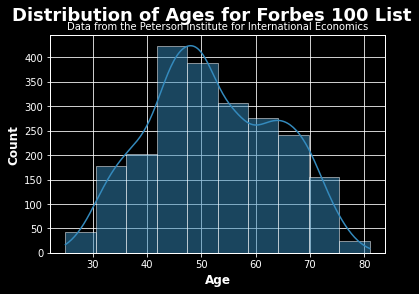

In [ ]:
plt.style.use('dark_background')
plt.suptitle('Distribution of Ages for Forbes 100 List', weight = 'bold', color = 'white').set_fontsize(18)
plt.title('Data from the Peterson Institute for International Economics', color = 'white').set_fontsize(10)
sns.histplot(base_1_clean['Idade'], kde=True, bins=10)
plt.xlabel('Age', weight = 'bold', color = 'white')
plt.ylabel('Count', weight = 'bold', color = 'white')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

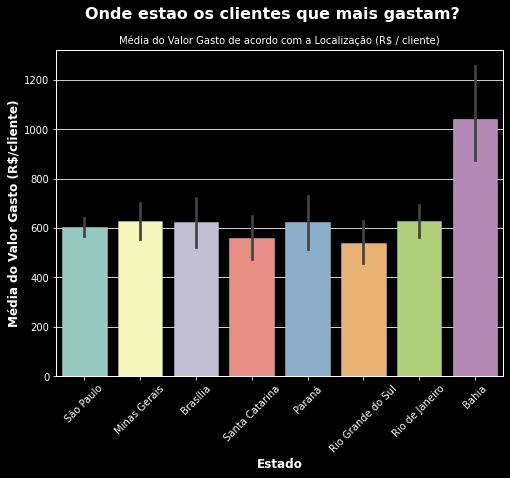

In [ ]:
plt.figure(figsize=(8,6))
plt.style.use('dark_background')
plt.suptitle('Onde estao os clientes que mais gastam?', weight='bold', color='white').set_fontsize(16)
plt.title('Média do Valor Gasto de acordo com a Localização (R$ / cliente)', color = 'white').set_fontsize(10)
sns.barplot('Localizacao', 'Total_Gasto', data = base_1_clean, edgecolor='silver')
plt.xlabel('Estado', weight = 'bold')
plt.ylabel('Média do Valor Gasto (R$/cliente)', weight = 'bold')
plt.xticks(rotation=45)

In [ ]:
bahia = base_1_clean[base_1_clean['Localizacao'] == 'Bahia']
display (bahia)

,ID,Dt_Nascto,Educacao,Est_Civil,Renda,Nro_Criancas,Nro_Adolesc,Dt_Cadastro,Recencia,Vlr_Vinho,...,Conv_ult_camp,Reclam_ult_2anos,Localizacao,Ano_Nascto,Ano_1o_Pedd,Idade_1o_Pedd,Frequencia,Total_Gasto,dt_ger_base,Idade
149,9323,1949-01-01,Master,Together,49912.0,0,1,2012-09-07,5,520,...,1,0,Bahia,1949,2012,63,22,874,2021-02-05,72.0
293,5080,1993-01-01,Graduation,Single,70515.0,0,0,2013-10-21,12,420,...,1,0,Bahia,1993,2013,20,16,1258,2021-02-05,28.0
1436,2920,1975-01-01,PhD,Single,52614.0,0,1,2012-12-01,63,789,...,0,0,Bahia,1975,2012,37,14,990,2021-02-05,46.0


bate com isto aqui???
https://miro.medium.com/v2/resize:fit:720/format:webp/1*tMKBH1Nw4WPcswSQoqO4vg.png

In [ ]:
#Quantidade de clientes por "Estado Civil"
dist_Est_Civil = base_1_clean['Est_Civil'].value_counts()
display ((dist_Est_Civil).sort_values(ascending=True))

YOLO          2
Absurd        2
Widow        77
Divorced    231
Single      482
Together    579
Married     864
Name: Est_Civil, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Estado Civil')

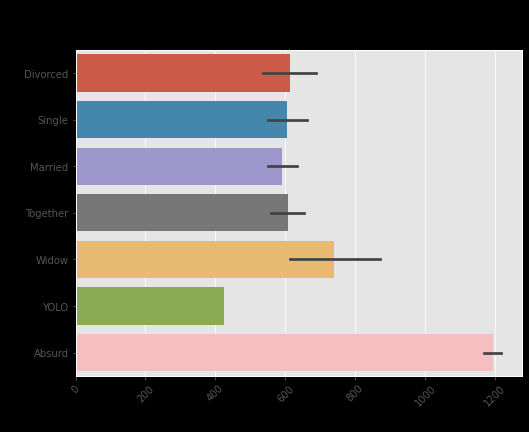

In [ ]:
plt.figure(figsize=(8,6))
plt.style.use('ggplot')
plt.suptitle('Clientes com estado civil "Absurd" gastam mais!', weight='bold', color='black').set_fontsize(16)
plt.title('Média do Valor Gasto de acordo com o Estado Civil (R$ / cliente)', color = 'black').set_fontsize(10)
sns.barplot('Total_Gasto', 'Est_Civil', data = base_1_clean, orient='h')
plt.xlabel('Média do Valor Gasto (R$ / cliente)', weight = 'bold', color = 'black')
plt.xticks(rotation=45)
plt.ylabel('Estado Civil', weight = 'bold', color = 'black')


In [ ]:
#Opção de gráfico... ficou bom também.. mas pra dar uma variada, usei o outro. 
#plt.figure(figsize=(8,6))
#plt.suptitle('Clientes com estado civil "Absurd" gastam mais!', weight='bold', color='white').set_fontsize(16)
#plt.title('Média do Valor Gasto de acordo com o Estado Civil (R$ / cliente)', color = 'white').set_fontsize(10)
#sns.barplot( 'Est_Civil', 'Total_Gasto', data = base_1_clean, edgecolor='silver')
#plt.xlabel('Estado Civil', weight = 'bold')
#plt.ylabel('Média do Valor Gasto (R$ / cliente)', weight = 'bold')
#plt.xticks(rotation=45)

In [ ]:
Gastos_Est_Civil = base_1_clean[base_1_clean['Est_Civil'] == 'Absurd']
display (Gastos_Est_Civil[['ID', 'Total_Gasto']])

,ID,Total_Gasto
1068,4369,1169
1339,7734,1216


In [ ]:
#create a list of all countries in original dataframe
Estados_br = list(base_1_clean.Localizacao.unique())


#create a list to store new dataframes
Canais_Vendas = list()

#create a list of all Canais
Canais = ['Site', 'Loja', 'Catalogo']

#create corresponding list of columns that store the sales attribution for each channel
cols = ['Nro_Peds_Site', 'Nro_Peds_Loja', 'Nro_Peds_Catlg' ]

#create loop to create dataframe for each channel
for channel in Canais:
    #get index of each channel so we can select the corresponding column
    col_index = Canais.index(channel)
    col = cols[col_index]

    #create dataframe for channel that contains all countries in the original dataframe
    base_canais_estados = pd.DataFrame(Estados_br, columns = ['Localizacao'])

    #create new column in dataframe that lists the channel
    base_canais_estados['Canal de Venda'] = channel
    #create new column in dataframe for attribution per sales channel. Assign a placeholder value to it.
    base_canais_estados['Nro_Pedidos'] = 0
    #get index for each row in dataframe
    ind = base_canais_estados.index
    '''get the sales attribution for each indexed row by querying corresponding column in original dataframe and getting sum for indexed
    country'''
    for i in ind:
        base_canais_estados.iloc[i, 2] = base_1_clean[base_1_clean['Localizacao'] == base_canais_estados.iloc[i, 0]][col].sum()
    #store dataframe for each channel in the list
    Canais_Vendas.append(base_canais_estados)
    
#merge all dataframes in list
base_canais_estados = pd.concat(Canais_Vendas, ignore_index = True)

#check
base_canais_estados

,Localizacao,Canal de Venda,Nro_Pedidos
0,São Paulo,Site,4378
1,Minas Gerais,Site,1154
2,Brasília,Site,484
3,Santa Catarina,Site,654
4,Paraná,Site,477
5,Rio Grande do Sul,Site,582
6,Rio de Janeiro,Site,1396
7,Bahia,Site,18
8,São Paulo,Loja,6348
9,Minas Gerais,Loja,1568


In [ ]:
print (Estados_br)

['São Paulo', 'Minas Gerais', 'Brasília', 'Santa Catarina', 'Paraná', 'Rio Grande do Sul', 'Rio de Janeiro', 'Bahia']


In [ ]:
# groupby não funcionou. PORQUE??? 
#gr = base_canais_estados.groupby('Canal de Venda')
#display (gr)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 <a list of 8 Text major ticklabel objects>)

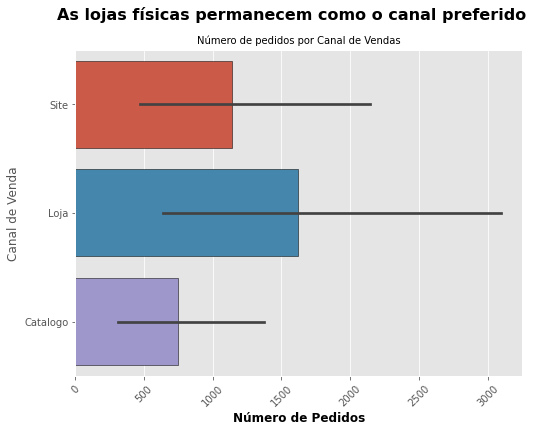

In [ ]:
plt.figure(figsize=(8,6))
plt.style.use('ggplot')
sns.barplot('Nro_Pedidos', 'Canal de Venda', data = base_canais_estados, edgecolor='black', orient='h')
plt.suptitle('As lojas físicas permanecem como o canal preferido', weight='bold', color = 'black').set_fontsize(16)
plt.title('Número de pedidos por Canal de Vendas', color = 'black').set_fontsize(10)
plt.xlabel('Número de Pedidos', weight = 'bold', color = 'black')
plt.xticks(rotation=45)




Agora vamos fazer a mesma categorização para os Produtos. De forma a descobrir os produtos preferidos pela base de clientes de cada estado

In [ ]:
#create a list of all countries in original dataframe
# Criando uma lista dos produtos
Prods_br = list()

# Criando a lista das categorias de produtos
Produtos = ['Vinho', 'Frutas', 'Carne', 'Peixe', 'Doces', 'Ouro']

# Criando a lista correspondente do valor vendido em cada categoria de produtos
cols = ['Vlr_Vinho','Vlr_Frutas', 'Vlr_Carne', 'Vlr_Peixe', 'Vlr_Doces', 'Vlr_Ouro']


#create loop to create dataframe for each Produto
for Prods in Produtos:

    #get index of each Prods so we can select the corresponding column
    col_index = Produtos.index(Prods)
    col = cols[col_index]

    #create dataframe for Prods that contains all countries in the original dataframe
    base_produtos_estados = pd.DataFrame(Estados_br, columns = ['Localizacao'])

    #create new column in dataframe that lists the Prods
    base_produtos_estados['Produto'] = Prods
    #create new column in dataframe for attribution per sales channel. Assign a placeholder value to it.
    base_produtos_estados['Valor Gasto'] = 0
    #get index for each row in dataframe
    ind = base_produtos_estados.index
    '''get the sales attribution for each indexed row by querying corresponding column in original dataframe and getting sum for indexed
    country'''
    for i in ind:
        base_produtos_estados.iloc[i, 2] = base_1_clean[base_1_clean['Localizacao'] == base_produtos_estados.iloc[i, 0]][col].sum()
    #store dataframe for each channel in the list
    Prods_br.append(base_produtos_estados)
    
#merge all dataframes in list
base_produtos_estados = pd.concat(Prods_br, ignore_index = True)

#check
base_produtos_estados.head(10)

,Localizacao,Produto,Valor Gasto
0,São Paulo,Vinho,337236
1,Minas Gerais,Vinho,84649
2,Brasília,Vinho,32406
3,Santa Catarina,Vinho,44372
4,Paraná,Vinho,37483
5,Rio Grande do Sul,Vinho,36253
6,Rio de Janeiro,Vinho,105910
7,Bahia,Vinho,1729
8,São Paulo,Frutas,28302
9,Minas Gerais,Frutas,7746


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 100000.0)

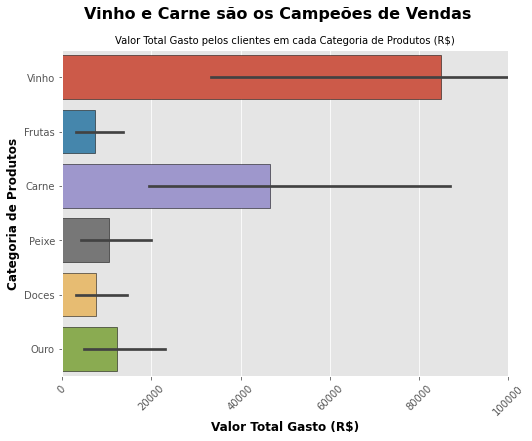

In [ ]:
plt.figure(figsize=(8,6))
plt.style.use('ggplot')
sns.barplot('Valor Gasto', 'Produto', data = base_produtos_estados, edgecolor='black', orient='h')
plt.suptitle('Vinho e Carne são os Campeões de Vendas', weight='bold', color = 'black').set_fontsize(16)
plt.title('Valor Total Gasto pelos clientes em cada Categoria de Produtos (R$)', color = 'black').set_fontsize(10)
plt.xlabel('Valor Total Gasto (R$)', weight = 'bold', color = 'black')
plt.xticks(rotation=45)
plt.ylabel('Categoria de Produtos', weight = 'bold', color = 'black')
plt.xlim(0, 100000)

In [ ]:
# No intuito de poder plotar os dados em gráficos e mapas posteriormente, vou buscar as informações da Latitude e Longitude de cada estado
print (Estados_br)

['São Paulo', 'Minas Gerais', 'Brasília', 'Santa Catarina', 'Paraná', 'Rio Grande do Sul', 'Rio de Janeiro', 'Bahia']


In [ ]:


from geopy.extra.rate_limiter import RateLimiter
geolocator = Nominatim(user_agent="GeoMM7.app")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

geo_SP = geolocator.geocode('São Paulo, Brazil')
geo_SC = geolocator.geocode('Santa Catarina, Brazil')
geo_MG = geolocator.geocode('Minas Gerais, Brazil')
geo_RS = geolocator.geocode('Rio Grande do Sul, Brazil')
geo_BA = geolocator.geocode('Bahia, Brazil')
geo_RJ = geolocator.geocode('Rio de Janeiro, Brazil')
geo_PR = geolocator.geocode('Parana, Brazil')
geo_BS = geolocator.geocode('Brasília, Brazil')

In [ ]:
# Criando um novo dicionario com as inforações de Latitude e Longitude 
Lat_Estados_br = {'São Paulo': geo_SP.latitude,
                  'Santa Catarina' : geo_SC.latitude,
                  'Rio Grande do Sul': geo_RS.latitude,
                  'Paraná': geo_PR.longitude,
                  'Brasília': geo_BS.latitude,
                  'Minas Gerais': geo_MG.latitude,
                  'Rio de Janeiro':geo_RJ.latitude,
                  'Bahia': geo_BA.latitude}


Long_Estados_br = {'São Paulo': geo_SP.longitude,
                  'Santa Catarina' : geo_SC.longitude,
                  'Rio Grande do Sul': geo_RS.longitude,
                  'Paraná': geo_PR.longitude,
                  'Brasília': geo_BS.longitude,
                  'Minas Gerais': geo_MG.longitude,
                  'Rio de Janeiro':geo_RJ.longitude,
                  'Bahia': geo_BA.longitude}


In [ ]:
print (Lat_Estados_br)

{'São Paulo': -23.5506507, 'Santa Catarina': -27.0628367, 'Rio Grande do Sul': -29.8425284, 'Paraná': -51.8148872, 'Brasília': -10.3333333, 'Minas Gerais': -18.5264844, 'Rio de Janeiro': -22.9110137, 'Bahia': -12.285251}


In [ ]:
base_produtos_estados['Latitude'] = base_produtos_estados['Localizacao'].map(Lat_Estados_br)
base_produtos_estados['Longitude'] = base_produtos_estados['Localizacao'].map(Long_Estados_br)
base_produtos_estados.head(10)

,Localizacao,Produto,Valor Gasto,Latitude,Longitude
0,São Paulo,Vinho,337236,-23.550651,-46.633382
1,Minas Gerais,Vinho,84649,-18.526484,-44.158865
2,Brasília,Vinho,32406,-10.333333,-53.200000
3,Santa Catarina,Vinho,44372,-27.062837,-51.114965
4,Paraná,Vinho,37483,-51.814887,-51.814887
5,Rio Grande do Sul,Vinho,36253,-29.842528,-53.768058
6,Rio de Janeiro,Vinho,105910,-22.911014,-43.209373
7,Bahia,Vinho,1729,-12.285251,-41.929478
8,São Paulo,Frutas,28302,-23.550651,-46.633382
9,Minas Gerais,Frutas,7746,-18.526484,-44.158865


In [ ]:
base_canais_estados['Latitude'] = base_canais_estados['Localizacao'].map(Lat_Estados_br)
base_canais_estados['Longitude'] = base_canais_estados['Localizacao'].map(Long_Estados_br)
base_canais_estados.head(10)

,Localizacao,Canal de Venda,Nro_Pedidos,Latitude,Longitude
0,São Paulo,Site,4378,-23.550651,-46.633382
1,Minas Gerais,Site,1154,-18.526484,-44.158865
2,Brasília,Site,484,-10.333333,-53.200000
3,Santa Catarina,Site,654,-27.062837,-51.114965
4,Paraná,Site,477,-51.814887,-51.814887
5,Rio Grande do Sul,Site,582,-29.842528,-53.768058
6,Rio de Janeiro,Site,1396,-22.911014,-43.209373
7,Bahia,Site,18,-12.285251,-41.929478
8,São Paulo,Loja,6348,-23.550651,-46.633382
9,Minas Gerais,Loja,1568,-18.526484,-44.158865


# Classificando os clientes por categorias 
por quartil   baaseado em frequencia e recencia e valor investido

For the purpose of this analysis we will be creating some new features from pre-existing features. These features are given thus;

**Frequency**: Total no of purchases made on all channels
**Total_Mnt**: Total Amount Spent on all Products
**Quarter**: Quarter of Customer's first Transaction
**Segment**: Segment customer falls into using RFM Score

In [ ]:
# Definindo os Atributos RFM
# Recencia (R) = baseado no nº de dias desde a última compra (poucos dias = + Recente; muitos dias = + antigo)
base_1_clean['at_R'] = pd.qcut(base_1_clean['Recencia'], 4, labels=['3_Muito Recente', '2_Recente',  '1_Antigo', '0_Muito Antigo'])

# Frequencia (R) =  baseado no nº de pedidos feitos nos últimos 2 anos (período da base) (poucos pedidos = Raramente Compra; muitos pedidos = cliente fiel)
base_1_clean['at_F'] = pd.qcut(base_1_clean['Frequencia'], 4, labels=['0_Raramente Compra', '1_Pouco Frequente', '2_Fiel', '3_Muito Fiel'] ) 


# Valor Monetario (M) =  baseado no valor total gasto nos últimos 2 anos (período da base)
base_1_clean['at_M'] = pd.qcut(base_1_clean['Total_Gasto'], 4, labels=['0_Valor Muito Baixo',  '1_Valor Baixo','2_Valor Alto','3_Valor Muito Alto'])


#concatenar para criar os Atributos RFM
base_1_clean['Atributos_RFM'] = base_1_clean['at_R'].astype(str) +" & " + base_1_clean['at_F'].astype(str) +" & " + base_1_clean['at_M'].astype(str)

In [ ]:
# atribuindo um valor a cada atributo do Score RFM (será usado nos gráficos)
base_1_clean['sc_R'] = pd.qcut(base_1_clean['Recencia'], 4, labels=['3','2', '1', '0']).astype(int)
base_1_clean['sc_F'] = pd.qcut(base_1_clean['Frequencia'], 4, labels=['0', '1', '2',' 3']).astype(int)
base_1_clean['sc_M'] = pd.qcut(base_1_clean['Total_Gasto'], 4, labels=['0', '1', '2',' 3']).astype(int)

#concatenar para criar o RFM Score
base_1_clean['Score_RFM'] = round((3*(base_1_clean['sc_R'].astype(int)) + 2*(base_1_clean['sc_F'].astype(int)) + base_1_clean['sc_M'].astype(int))/4)

In [ ]:
#Quantidade de clientes em cda segmento RFM
qtd_score = base_1_clean['Score_RFM'].value_counts()
display ((qtd_score).sort_values(ascending=True))

0.0    196
1.0    266
3.0    378
4.0    412
2.0    985
Name: Score_RFM, dtype: int64

Perfeito! 

Criamos **05 segmentos** distintos, e distribuimos todos os clientes da base entre estes grupos considerando os fatores como Recencia (dias desde a última compra, Frequencia  (quantidade de pedidos nos últimos 2 anos) e Valor Gasto (nos últitmos 2 anos).

Os segmentos de clientes ficaram da seguinte forma:

* **4.0 = *Clientes Premium* =** Comprou Muito Recentemente, Cliente Fiel e compra valores altos.  (412 clientes)

* **3.0 = *Premium Potencial* =** Comprou Recentemente, Mas é pouco frequente e com valores baixos.  (378 clientes)

* **2.0 = *Clientes Padrão* =** Comprou Recentemente, fiel ou muito Fiel, valores Altos ou Baixos.   (985 clientes)

* **1.0 = *Risco de Abandono* =** Comprou Recentemente, Mas é pouco frequente e com valores baixos.  (266 clientes)

* **0.0 = *Inativos*  =** Muito Antigo & Raramente Compra  & Valor Muito Baixo  (196 clientes)


In [ ]:
# Criando uma coluna para os nomes dos Segmentos 
base_1_clean['Segmento'] = base_1_clean['Score_RFM']


# dando nome aos segmentos para cada cliente a partir do Score RFM que já lhe fora atribuido previamente
base_1_clean['Segmento'] = base_1_clean['Segmento'].replace([4],['Premium'])
base_1_clean['Segmento'] = base_1_clean['Segmento'].replace([3.0],['Premium Potencial'])
base_1_clean['Segmento'] = base_1_clean['Segmento'].replace([2.0],['Padrão'])
base_1_clean['Segmento'] = base_1_clean['Segmento'].replace([1.0],['Risco Abandono'])
base_1_clean['Segmento'] = base_1_clean['Segmento'].replace([0.0],['Inativo'])

In [ ]:
# conferindo
qtd_score = base_1_clean['Score_RFM'].value_counts()
display ((qtd_score).sort_values(ascending=True))

0.0    196
1.0    266
3.0    378
4.0    412
2.0    985
Name: Score_RFM, dtype: int64

In [ ]:
qtd_nome = base_1_clean['Segmento'].value_counts()
display ((qtd_nome).sort_values(ascending=True))

Inativo              196
Risco Abandono       266
Premium Potencial    378
Premium              412
Padrão               985
Name: Segmento, dtype: int64

In [ ]:

display(base_1_clean[['ID','Recencia','Frequencia','Total_Gasto', 'sc_R', 'at_R','sc_F','at_F', 'sc_M','at_M', 'Score_RFM','Segmento','Atributos_RFM']])

,ID,Recencia,Frequencia,Total_Gasto,sc_R,at_R,sc_F,at_F,sc_M,at_M,Score_RFM,Segmento,Atributos_RFM
0,1826,0,14,1190,3,3_Muito Recente,2,2_Fiel,3,3_Valor Muito Alto,4.0,Premium,3_Muito Recente & 2_Fiel & 3_Valor Muito Alto
1,1,0,17,577,3,3_Muito Recente,2,2_Fiel,2,2_Valor Alto,4.0,Premium,3_Muito Recente & 2_Fiel & 2_Valor Alto
2,10476,0,10,251,3,3_Muito Recente,1,1_Pouco Frequente,1,1_Valor Baixo,3.0,Premium Potencial,3_Muito Recente & 1_Pouco Frequente & 1_Valor Baixo
3,1386,0,3,11,3,3_Muito Recente,0,0_Raramente Compra,0,0_Valor Muito Baixo,2.0,Padrão,3_Muito Recente & 0_Raramente Compra & 0_Valor Muito Baixo
4,5371,0,6,91,3,3_Muito Recente,0,0_Raramente Compra,1,1_Valor Baixo,2.0,Padrão,3_Muito Recente & 0_Raramente Compra & 1_Valor Baixo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,99,18,689,0,0_Muito Antigo,2,2_Fiel,2,2_Valor Alto,2.0,Padrão,0_Muito Antigo & 2_Fiel & 2_Valor Alto
2236,5263,99,4,55,0,0_Muito Antigo,0,0_Raramente Compra,0,0_Valor Muito Baixo,0.0,Inativo,0_Muito Antigo & 0_Raramente Compra & 0_Valor Muito Baixo
2237,22,99,12,309,0,0_Muito Antigo,1,1_Pouco Frequente,1,1_Valor Baixo,1.0,Risco Abandono,0_Muito Antigo & 1_Pouco Frequente & 1_Valor Baixo
2238,528,99,19,1383,0,0_Muito Antigo,3,3_Muito Fiel,3,3_Valor Muito Alto,2.0,Padrão,0_Muito Antigo & 3_Muito Fiel & 3_Valor Muito Alto


([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

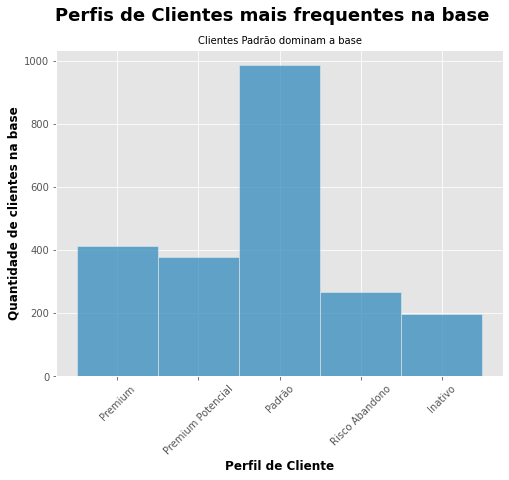

In [ ]:
plt.figure(figsize=(8,6))
plt.style.use('ggplot')
plt.suptitle('Perfis de Clientes mais frequentes na base', weight = 'bold', color = 'black').set_fontsize(18)
plt.title('Clientes Padrão dominam a base', color = 'black').set_fontsize(10)
sns.histplot(base_1_clean['Segmento'], kde=False)
plt.xlabel('Perfil de Cliente', weight = 'bold', color = 'black')
plt.ylabel('Quantidade de clientes na base', weight = 'bold', color = 'black')
plt.xticks(rotation=45)


A partir daqui, vamos continuar as analises no Tableau. 
vou exportar os arquivos para seguir trabalhando pro la´.

In [ ]:
base_1_clean.to_excel('Maven_Clientes_db1_clean.xlsx', encoding='utf-8', sheet_name='maven_db1', index = False)
base_produtos_estados.to_excel('Maven_Clientes_db1_prods_estados.xlsx', encoding='utf-8', sheet_name='Prods', index = False)
base_canais_estados.to_excel('Maven_Clientes_db1_canais_estados.xlsx', encoding='utf-8', sheet_name='Canal', index = False)

In [ ]:
#Exportando os arquivos (originalmente trabalhados no Google Colab)
files.download('Maven_Clientes_db1_clean.xlsx')
files.download('Maven_Clientes_db1_prods_estados.xlsx')
files.download('Maven_Clientes_db1_canais_estados.xlsx')

# Canais x Estados | Maven MKT clientes
# Produtos x Estados | Maven MKT clientes

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# GRAFICOS DE TESTE

ValueError: ignored

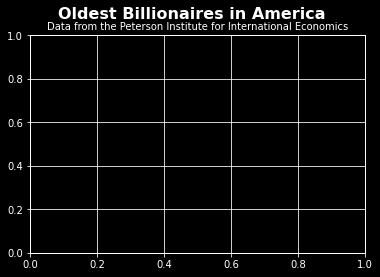

In [ ]:
########### NAO FICOU BONITO ########### MELHORAR OU TIRAR
plt.style.use('dark_background')
plt.suptitle('Oldest Billionaires in America', weight = 'bold', color = 'white').set_fontsize(16)
plt.title('Data from the Peterson Institute for International Economics', color = 'white').set_fontsize(10)
sns.scatterplot(x = 'Valor Gasto', y = 'Canal de Venda', hue = 'Localizacao', data = base_canais_estados)
plt.xlabel('Name', weight = 'bold', color = 'white')
plt.ylabel('Net worth in Billions (USD)', weight = 'bold', color = 'white')
plt.xticks(rotation=90)

In [ ]:
########### NAO FICOU BONITO ########### MELHORAR OU TIRAR
plt.figure(figsize=(8,6))
plt.style.use('dark_background')
plt.suptitle('Oldest Billionaires in America', weight = 'bold', color = 'white').set_fontsize(16)
plt.title('Data from the Peterson Institute for International Economics', color = 'white').set_fontsize(10)
sns.scatterplot(x = 'Localizacao', y = 'Valor Gasto', data = base_produtos_estados, hue = 'Produto', sizes= 'Valor Gasto')
plt.xlabel('Name', weight = 'bold', color = 'white')
plt.ylabel('Net worth in Billions (USD)', weight = 'bold', color = 'white')
plt.xticks(rotation=90)


# Texto da chin

The remainder of this analysis and visualisation will be carried out using PowerBI. The clean dataset will be exported as a CSV file and be loaded into PowerBI for the analysis.



### export clean dataframes to csv files

* marketing_clean.to_csv('marketing_data_cleaned.csv', index = False)

* channel_df.to_csv('channels.csv', index = False)

* product_df.to_csv('product.csv', index = False)

In [ ]:
#base_1_clean['Score_RFM'].plot()

In [ ]:
########### NAO FICOU BONITO ########### MELHORAR OU TIRAR# sns.pairplot(base_produtos_estados, hue='Localizacao', vars=['Valor Gasto', 'Produto'])
#pairplot não funcionou

In [ ]:
########### NAO FICOU BONITO ########### MELHORAR OU TIRAR
#plt.figure(figsize=(8,20))
#sns.barplot(x = 'Score_RFM', y = 'Atributos_RFM', data = base_1_clean, color = 'orange', edgecolor='black', ci=False)

In [ ]:
sns.barplot(x = base_1_clean['Score_RFM'], y = base_1_clean['Total_Gasto'].value_counts(), data = base_1_clean, color = 'orange', edgecolor='black', ci=False)


In [ ]:
########### NAO FICOU BONITO ########### MELHORAR OU TIRAR
base_1_clean['Score_RFM'].value_counts().plot(kind='bar')

In [ ]:
plt.style.use('ggplot')
plt.suptitle('Countries with the Most Billionaires Per Capita', weight='bold', color = 'black').set_fontsize(18)
plt.title('Data courtesy of The Peterson Institute for International Economics', color = 'black').set_fontsize(10)
sns.barplot('Country_code', 'Country_code_percent', data = citizen, edgecolor='black')
plt.xlabel('Country (Abbrv.)', weight = 'bold', color = 'black')
plt.ylabel('Billionaires (Percentage)', weight = 'bold', color = 'black')
plt.xticks(rotation=45)
plt.gca().invert_xaxis()



# manipulação dos dados


# Sort by age in ascending order
df_sorted = df.sort_values(by='Count')
df_sorted.head()


# Sort by income in descending order
df_sorted = df.sort_values(by='Rank', ascending=False)
df_sorted.head()

# Sort by multiple columns
df_sorted = df.sort_values(by=['Count', 'Rank'])
df_sorted.head()



convert to numeric data types.
billion_dat['foundingdate'] = billion_dat['foundingdate'].astype(float)

 impute placeholder values to replace NAs and retain rows in the dataset.
billion_dat['age'].mean()
57.40386990531083
billion_dat['selfmade'] = billion_dat['selfmade'].fillna('non-finance')


# fill missing values with 0
df.fillna(0)

# forward-fill missing values (propagates last valid observation forward to next)
df.fillna(method='ffill')

# backward-fill missing values (propagates next valid observation backward to last)
df.fillna(method='bfill')

# fill missing values using interpolation
df.interpolate()


It is important to note that the fillna() method returns a new DataFrame with the missing values filled in and does not modify the original DataFrame in place. If you want to modify the original DataFrame, you can use the inplace parameter and set it to True.


# fill missing values in place
df.fillna(0, inplace=True)





# Rename column 'Count' to 'count'
df_rename = df.rename(columns={'Count': 'count'})
df_rename.head()

You can also use a dictionary to rename multiple columns at once:

df_rename = df.rename(columns={'Count': 'count', 'Rank':'rank'})
df_rename.head()



pd.pivot_table() is a method in the Pandas library that is used to create a pivot table from a DataFrame. 

pivot_table = pd.pivot_table(df, index='Ethnicity', values='Count', aggfunc='sum')

pivot_table.head()

You can also include more columns

pivot_table = pd.pivot_table(df, index=['Ethnicity','Gender'], values= 'Count' , aggfunc=['sum','count'])
pivot_table.head(20)



Que é bem parecida com a 
Groupby()
you can then use to perform various operations on the groups, such as calculating the sum, mean, or count of the values in each group.

grouped = df.groupby('Gender')
# Print the mean of each group
print(grouped.mean())



# Select the first two rows
print(df.iloc[:2])
# Select the first column
print(df.iloc[:, 0])


# Select the column name 'Gender'
print(df.loc[:,'Gender'])


# Select the columns named 'Year of Birth' and 'Gender'
print(df.loc[:, ['Year of Birth', 'Gender']])


7. df.assign()
Pandas’ .assign() function is used to add new columns to a DataFrame, based on the computation of existing columns


df_new = df.assign(count_plus_5=df['Count'] + 5)
df_new.head()

ref (https://bit.ly/3YVfUNS)

Pandas’ .query() function allows you to filter a DataFrame based on a Boolean expression. It allows you to select rows from a DataFrame using a query string similar to SQL.

# Select rows where age is greater than 30 and income is less than 65000
df_query = df.query('Count > 30 and Rank < 20')
df_query.head()


# Select rows where gender is Male
df_query = df.query("Gender == 'MALE'")
df_query.head()







plotagem (analise exploratoria)

df.plot()
df['Gender'].value_counts().plot(kind='bar')

graficos, muitos graficos (usano seaborn)
pegar os códigos dos graficos do Zach.. estao muito bons... 





Conclusão


Responendo às respostas iniciais





# **CHECKLIST LIMPEZA **
* Missing Values        (    .isna().sum()   ou   .isnull()   )
* Duplicate Entries     (   .duplicated().sum()   ) 
* Invalid Entries
* Inaccurate Entries
* Inconsistent Syntax
* Wrong Datatypes


colocar a iframe abaixo no Readme file para explicar o que RFM. para quem não é da área de MKT. há variações desta explicação, dependendo de onde vc procura. mas eu gosto paraticularmente desta da Oracle pq há menos segmentações.. 

`## <iframe width="560" height="315" src="https://www.youtube.com/embed/ueF-wVpD2rg" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>##`

FAzer um grafico como este aqui..
https://docs.oracle.com/cloud/latest/related-docs/OMCEZ/pt_br/Resources/Images/RFM/RFM_AnalysisOverview_thumb_800_600.png

Vale a pena trazer dados do google Trends??? buscs por algum termo relacxionaod???

To generate a CSV you can simply download the results of your Google Trends query.

Para o final...



Want feedback on your solutions?
Share visualizations (and any applicable pivot tables, code, etc) on LinkedIn and mention @Maven Analytics. We would love to see your work and give our thoughts!


Data Analysis
Data Engineering
Data_Visualization
Machine Learning (coming soon)